In [3]:
from control import TransferFunction, tf, bode_plot, step_response
import numpy as np
from matplotlib.pyplot import plot, show
%matplotlib inline

In [ ]:
N = 100
t = np.linspace(0, 10, 100)

Kp = 2.26 # Kp
tau = 0.17 # tau
zeta = 0.72 # zeta
theta = -0.03 # theta

# create linear interpolation of the u data versus time
uf = interp1d(t,u)

In [41]:
def model(x,t,uf,Kp,taus,zeta,thetap):
    """ Model a second-order linear system with time delay.
    Second-order process with dead time (SOPDT) """
    # Kp = process gain
    # tau = second order time constant
    # zeta = damping factor
    # theta = model time delay
    # ts^2 dy2/dt2 + 2 zeta tau dydt + y = Kp u(t-theta)
    # time-shift u
    try:
        if (t-thetap) <= 0:
            um = uf(0.0)
        else:
            um = uf(t-thetap)
    except:
        # catch any error
        um = u0
    # two states (y and y')
    y = x[0] - y0
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*taus*dydt - y + Kp*(um-u0))/taus**2
    return [dydt,dy2dt2]

In [43]:
# simulate model with x=[Km,taum,thetam]
def simulate(Kp,tau,zeta,theta):
    
    # storage for model values
    xm = np.zeros((N,2))

    # initial condition
    xm[0] = 0

    # loop through time steps    
    for i in range(0,ns-1):
        ts = [t[i],t[i+1]]
        inputs = (uf,Kp,taus,zeta,thetap)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # integrate SOPDT model
            x = odeint(model,xm[i],ts,args=inputs)

        xm[i+1] = x[-1]

    y = xm[:,0]
    return y

## Simple Model (ignore dead-time)

In [4]:
Kp = 2.26   # Process gain
tau = 0.17  # Time constant, normalized 0-1
theta = -0.03  # Dead time, normalized 0-1
zeta = 0.72    # Damping ratio

s = TransferFunction.s
H = Kp / (s ** 2 * tau ** 2  + 2 * zeta * tau * s + 1)

sys = tf(H)

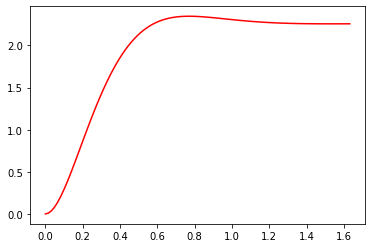

In [5]:
t, out = step_response(sys)
plot(t, out, 'r-')